# Statistics
This notebook is part of a collection of supplementary material designed to bring student up to speed on the mathematics required for COMP47750 Mathematics with Python.   
This notebook introduces covariance matrices and data normalisation.  
This material is covered in the lecture **M1 Statistics**.   
  
You may need to install `seaborn` to run this notebook.  
You could use the command `pip install seaborn` from the command line.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
# Load the Penguins dataset
penguins_all = pd.read_csv('penguins_af.csv')

Reduce the dataset to just 4 descriptive features and the class label `species`

In [10]:
label_4f = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'species']
penguins_4f = penguins_all[label_4f]

In [11]:
penguins_4f['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

### Seaborn Pairplot
This provides a good overview of the relationships between the features.  
The plots on the diagonal show the feature distributions.  
The off-diagonal plots provide insight on feature correlations. 

/home/lucas/anaconda3/envs/UCD_DataScience/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


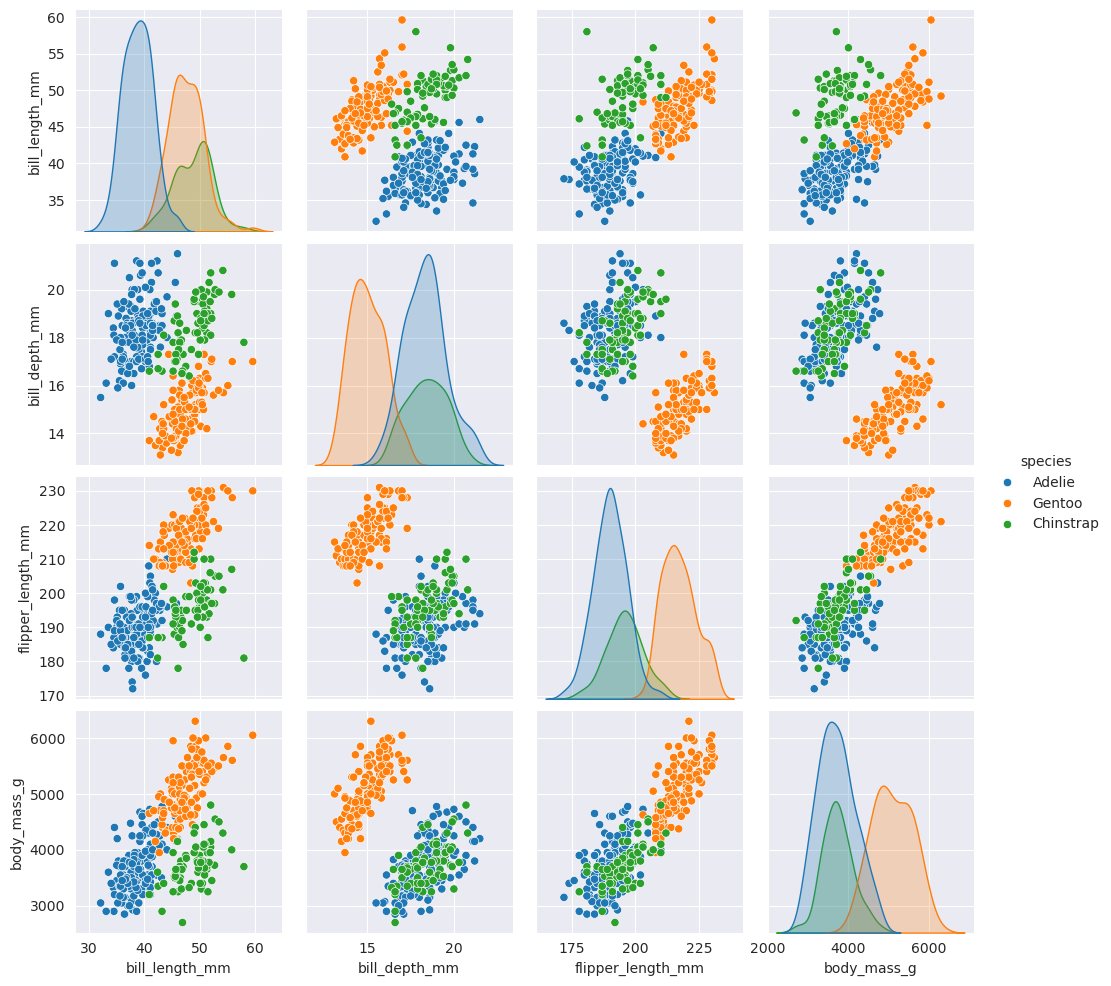

In [12]:
sns.pairplot(penguins_4f, hue="species")

Extract a dataframe with just the `Gentoo` samples. 

In [13]:
Gentoo_df = penguins_4f[penguins_4f['species']=='Gentoo']

In [14]:
Gentoo_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
146,46.1,13.2,211.0,4500.0,Gentoo
147,50.0,16.3,230.0,5700.0,Gentoo
148,48.7,14.1,210.0,4450.0,Gentoo
149,50.0,15.2,218.0,5700.0,Gentoo
150,47.6,14.5,215.0,5400.0,Gentoo


/home/lucas/anaconda3/envs/UCD_DataScience/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


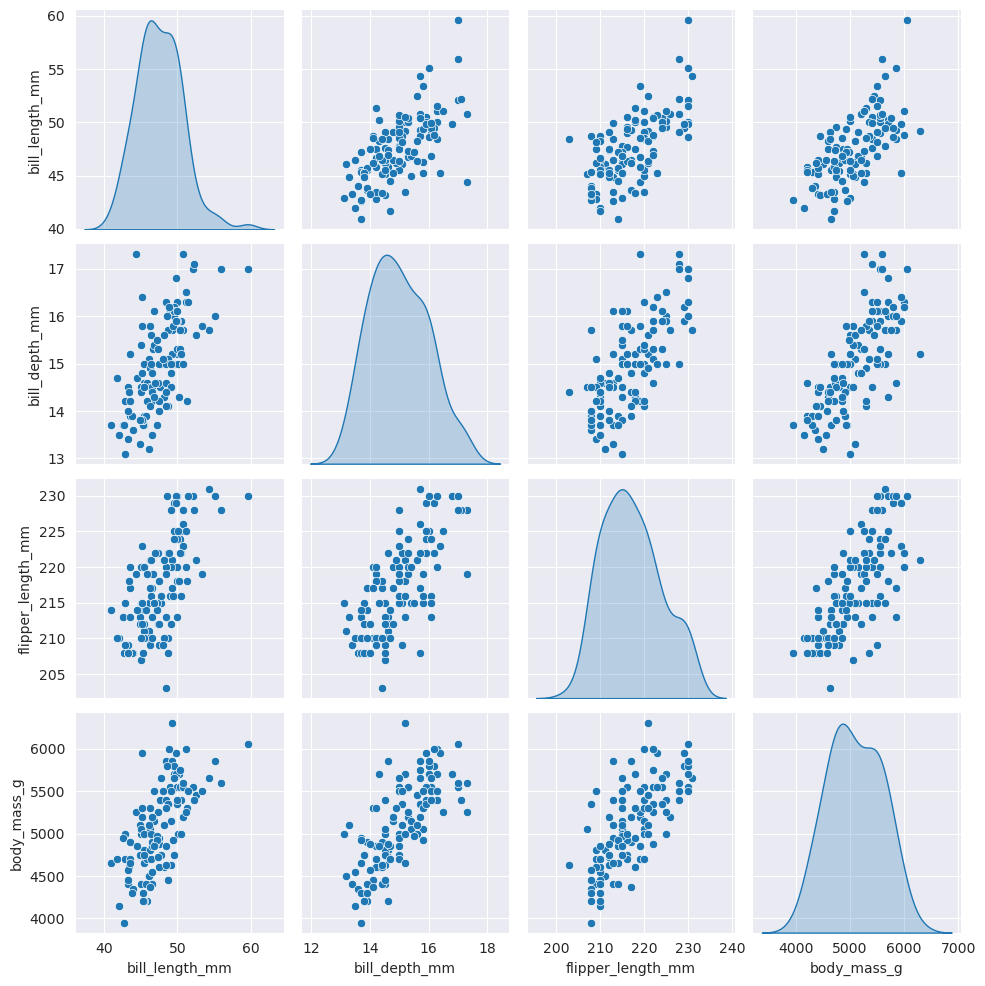

In [15]:
sns.pairplot(Gentoo_df, diag_kind = 'kde')

The covariance matrix for the `Gentoo` class. 

In [17]:
Gentoo_df.cov().round(decimals = 2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
146,46.1,13.2,211.0,4500.0,Gentoo
147,50.0,16.3,230.0,5700.0,Gentoo
148,48.7,14.1,210.0,4450.0,Gentoo
149,50.0,15.2,218.0,5700.0,Gentoo
150,47.6,14.5,215.0,5400.0,Gentoo
...,...,...,...,...,...
260,47.2,13.7,214.0,4925.0,Gentoo
261,46.8,14.3,215.0,4850.0,Gentoo
262,50.4,15.7,222.0,5750.0,Gentoo
263,45.2,14.8,212.0,5200.0,Gentoo


Normalise the data to get a clearer picture.  
The four features are normalised to mean = 0 and standard deviation = 1.

In [18]:
Gentoo_df.pop('species')
Gentoo_dfN = (Gentoo_df-Gentoo_df.mean())/Gentoo_df.std()

In [19]:
Gentoo_dfN.cov().round(decimals = 2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,0.65,0.66,0.67
bill_depth_mm,0.65,1.00,0.71,0.72
flipper_length_mm,0.66,0.71,1.00,0.71
body_mass_g,0.67,0.72,0.71,1.00


### Law of Large Numbers 
Estimating Means

In [20]:
n_trials = 100000
sample_means = []
for trial in range(n_trials):
    sample_means.append(Gentoo_dfN.sample(5)['body_mass_g'].values.mean())

/home/lucas/anaconda3/envs/UCD_DataScience/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


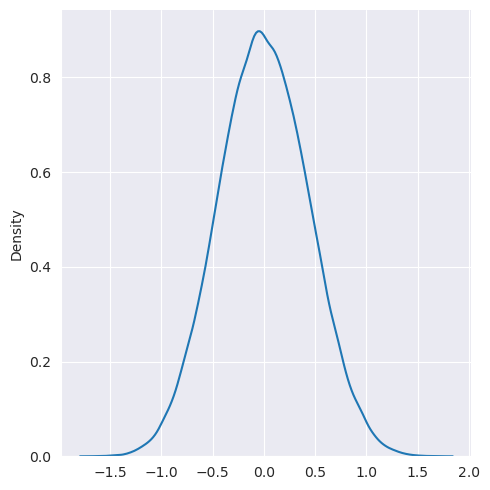

In [21]:
sns.displot(sample_means, kind = 'kde')